In [108]:
import pandas as pd
import re
from sklearn.impute import SimpleImputer

In [109]:
df = pd.read_csv("PCOS.csv")

In [110]:
df.head()

,Timestamp,Email Address,What is your age?,What is your city of birth?,What is your weight? (kg),What is your height? (feet),What is your marital status?,What is your occupational status?,What is your education level?,HEALTH [Do you have PCOS?],...,Diet:\nHow many days per week do you consume the following? [Multivitamin/Mineral supplement ],Are you vegetarian?,How often do you engage in physical activity or exercise per week?,What type of exercises do you usually perform? (Select all that apply.),How long is your average exercise session?,How many hours of sleep do you typically get each night? \n,Do you experience high level of areas of stress in your daily life?\n,Do you smoke?,"Do you feel exercise has helped manage your PCOS symptoms (e.g., weight, mood, energy levels, or menstrual regularity)?",Are you currently taking any medication for PCOS?
0,12/17/2024 23:47:24,bsdsf22m018@pucit.edu.pk,20-25,Lahore,70.0,5'7,Unmarried (have never been married),Student,Undergraduate,"Yes, diagnosed by a doctor",...,Never,No,Rarely,NaN,Not Applicable,6-8 hours,Yes,No,Somewhat,"Yes, hormonal therapy (e.g., birth control pills)"
1,12/18/2024 0:22:18,zainabnaveed137@gmail.com,20-25,Lahore,66.0,5'2,Unmarried (have never been married),Student,Undergraduate,No,...,Never,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,NaN,NaN
2,12/18/2024 0:30:23,emanhamza234467@gmail.com,Less than 20,Lahore,56.0,5’5,Unmarried (have never been married),Student,Undergraduate,No,...,Never,No,Daily,NaN,Less than 30 minutes,6-8 hours,No,No,NaN,NaN
3,12/18/2024 0:30:52,BSDSF24A021@pucit.edu.pk,Less than 20,Lahore,89.0,5'6,Unmarried (have never been married),Student,High School or Below,No,...,Never,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
4,12/18/2024 0:31:14,rawantariq835@gmail.com,20-25,Jeddah,55.0,5'3,Unmarried (have never been married),Student,Graduate,No,...,1 day,No,Never,NaN,Not Applicable,6-8 hours,Yes,No,Somewhat,No.


In [111]:
df.drop(['Timestamp', 'Email Address' , 'What is your occupational status? ' , 'What is your education level? ' , 'What is your city of birth? '], axis=1, inplace=True)
df.head()

,What is your age?,What is your weight? (kg),What is your height? (feet),What is your marital status?,HEALTH [Do you have PCOS?],HEALTH [Do you have a family history of PCOS?],HEALTH [Have you ever experienced irregularity in mensturation (except preganant women)],HEALTH [Have you ever experienced harmonal imbalances?],HEALTH [Do you have hyperandrogenism? (higher levels of male hormones like testosterone ).],HEALTH [Do you have hirutism? (excessive hair growth)],...,Diet:\nHow many days per week do you consume the following? [Multivitamin/Mineral supplement ],Are you vegetarian?,How often do you engage in physical activity or exercise per week?,What type of exercises do you usually perform? (Select all that apply.),How long is your average exercise session?,How many hours of sleep do you typically get each night? \n,Do you experience high level of areas of stress in your daily life?\n,Do you smoke?,"Do you feel exercise has helped manage your PCOS symptoms (e.g., weight, mood, energy levels, or menstrual regularity)?",Are you currently taking any medication for PCOS?
0,20-25,70.0,5'7,Unmarried (have never been married),"Yes, diagnosed by a doctor",No,"Yes, diagnosed by a doctor","Yes, diagnosed by a doctor","Yes, diagnosed by a doctor","Yes, diagnosed by a doctor",...,Never,No,Rarely,NaN,Not Applicable,6-8 hours,Yes,No,Somewhat,"Yes, hormonal therapy (e.g., birth control pills)"
1,20-25,66.0,5'2,Unmarried (have never been married),No,No,"Yes, not diagnosed by a doctor",No,No,No,...,Never,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,NaN,NaN
2,Less than 20,56.0,5’5,Unmarried (have never been married),No,No,No,No,No,No,...,Never,No,Daily,NaN,Less than 30 minutes,6-8 hours,No,No,NaN,NaN
3,Less than 20,89.0,5'6,Unmarried (have never been married),No,"Yes, diagnosed by a doctor",No,No,No,"Yes, not diagnosed by a doctor",...,Never,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
4,20-25,55.0,5'3,Unmarried (have never been married),No,"Yes, diagnosed by a doctor",No,"Yes, not diagnosed by a doctor",No,"Yes, not diagnosed by a doctor",...,1 day,No,Never,NaN,Not Applicable,6-8 hours,Yes,No,Somewhat,No.


In [112]:
def convert_to_cm(height):
    if isinstance(height, str):
        # Use regex to extract feet and 
        height = height.replace('’', "'")
        match = re.match(r"(\d+)'(\d+)", height)
        if match:
            feet = int(match.group(1))    # Extract feet
            inches = int(match.group(2)) # Extract inches
            # Convert to cm: 1 foot = 30.48 cm, 1 inch = 2.54 cm
            return feet * 30.48 + inches * 2.54
    return None  # Return None for invalid entries

# Apply the conversion function
df['What is your height? (feet)'] = df['What is your height? (feet)'].apply(convert_to_cm)
print("After Conversion")
# Display the DataFrame
print(df.head())


After Conversion
  What is your age?   What is your weight? (kg)  What is your height? (feet)  \
0              20-25                       70.0                       170.18   
1              20-25                       66.0                       157.48   
2       Less than 20                       56.0                       165.10   
3       Less than 20                       89.0                       167.64   
4              20-25                       55.0                       160.02   

          What is your marital status?  HEALTH [Do you have PCOS?]  \
0  Unmarried (have never been married)  Yes, diagnosed by a doctor   
1  Unmarried (have never been married)                          No   
2  Unmarried (have never been married)                          No   
3  Unmarried (have never been married)                          No   
4  Unmarried (have never been married)                          No   

  HEALTH [Do you have a family history of PCOS?]  \
0                            

In [113]:
df = df.set_axis( [
    "Age",
    "Weight_kg",
    "Height_ft",
    "Marital_Status",
    "PCOS",
    "Family_History_PCOS",
    "Menstrual_Irregularity",
    "Hormonal_Imbalance",
    "Hyperandrogenism",
    "Hirsutism",
    "Mental_Health",
    "Conception_Difficulty",
    "Insulin_Resistance",
    "Diabetes",
    "Childhood_Trauma",
    "Cardiovascular_Disease",
    "Diet_Bread_Cereals",
    "Diet_Milk_Products",
    "Diet_Fruits",
    "Diet_Vegetables",
    "Diet_Starchy_Vegetables",
    "Diet_NonStarchy_Vegetables",
    "Diet_Fats",
    "Diet_Sweets",
    "Diet_Fried_Food",
    "Diet_Tea_Coffee",
    "Diet_Multivitamin",
    "Vegetarian",
    "Exercise_Frequency",
    "Exercise_Type",
    "Exercise_Duration",
    "Sleep_Hours",
    "Stress_Level",
    "Smoking",
    "Exercise_Benefit",
    "PCOS_Medication"
]
, axis=1 )

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         177 non-null    object 
 1   Weight_kg                   177 non-null    float64
 2   Height_ft                   177 non-null    float64
 3   Marital_Status              177 non-null    object 
 4   PCOS                        177 non-null    object 
 5   Family_History_PCOS         177 non-null    object 
 6   Menstrual_Irregularity      177 non-null    object 
 7   Hormonal_Imbalance          177 non-null    object 
 8   Hyperandrogenism            177 non-null    object 
 9   Hirsutism                   177 non-null    object 
 10  Mental_Health               177 non-null    object 
 11  Conception_Difficulty       177 non-null    object 
 12  Insulin_Resistance          177 non-null    object 
 13  Diabetes                    177 non

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,...,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
0,20-25,70.0,170.18,Unmarried (have never been married),"Yes, diagnosed by a doctor",No,"Yes, diagnosed by a doctor","Yes, diagnosed by a doctor","Yes, diagnosed by a doctor","Yes, diagnosed by a doctor",...,Never,No,Rarely,NaN,Not Applicable,6-8 hours,Yes,No,Somewhat,"Yes, hormonal therapy (e.g., birth control pills)"
1,20-25,66.0,157.48,Unmarried (have never been married),No,No,"Yes, not diagnosed by a doctor",No,No,No,...,Never,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,NaN,NaN
2,Less than 20,56.0,165.10,Unmarried (have never been married),No,No,No,No,No,No,...,Never,No,Daily,NaN,Less than 30 minutes,6-8 hours,No,No,NaN,NaN
3,Less than 20,89.0,167.64,Unmarried (have never been married),No,"Yes, diagnosed by a doctor",No,No,No,"Yes, not diagnosed by a doctor",...,Never,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
4,20-25,55.0,160.02,Unmarried (have never been married),No,"Yes, diagnosed by a doctor",No,"Yes, not diagnosed by a doctor",No,"Yes, not diagnosed by a doctor",...,1 day,No,Never,NaN,Not Applicable,6-8 hours,Yes,No,Somewhat,No.


In [114]:
# Dropping rows with multiple answers
df = df[~df.apply(lambda row: row.astype(str).str.contains('No, Yes, diagnosed by a doctor').any(), axis=1)]

# Replacing specific values
df['Marital_Status'] = df['Marital_Status'].replace('Unmarried (have never been married)', 'Unmarried')
df['PCOS'] = df['PCOS'].replace('Yes, diagnosed by a doctor', 'Yes')
df['PCOS'] = df['PCOS'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Family_History_PCOS'] = df['Family_History_PCOS'].replace('Yes, diagnosed by a doctor', 'Yes')
df['Family_History_PCOS'] = df['Family_History_PCOS'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Menstrual_Irregularity'] = df['Menstrual_Irregularity'].replace('Yes, diagnosed by a doctor', 'Yes')
df['Menstrual_Irregularity'] = df['Menstrual_Irregularity'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Hormonal_Imbalance'] = df['Hormonal_Imbalance'].replace('Yes, diagnosed by a doctor', 'Yes')
df['Hormonal_Imbalance'] = df['Hormonal_Imbalance'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Hyperandrogenism'] = df['Hyperandrogenism'].replace('Yes, diagnosed by a doctor', 'Yes')
df['Hyperandrogenism'] = df['Hyperandrogenism'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Hirsutism'] = df['Hirsutism'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Hirsutism'] = df['Hirsutism'].replace('Yes, diagnosed by a doctor', 'Yes')
df['Mental_Health'] = df['Mental_Health'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Mental_Health'] = df['Mental_Health'].replace('Yes, diagnosed by a doctor', 'Yes')
df['Insulin_Resistance'] = df['Insulin_Resistance'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Insulin_Resistance'] = df['Insulin_Resistance'].replace('Yes, diagnosed by a doctor', 'Yes')
df['Diabetes'] = df['Diabetes'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Diabetes'] = df['Diabetes'].replace('Yes, diagnosed by a doctor', 'Yes')
df['Childhood_Trauma'] = df['Childhood_Trauma'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Childhood_Trauma'] = df['Childhood_Trauma'].replace('Yes, diagnosed by a doctor', 'Yes')
df['Cardiovascular_Disease'] = df['Cardiovascular_Disease'].replace('Yes, not diagnosed by a doctor', 'Yes')
df['Cardiovascular_Disease'] = df['Cardiovascular_Disease'].replace('Yes, diagnosed by a doctor', 'Yes')


In [115]:
#Diet
df['Diet_Bread_Cereals'] = df['Diet_Bread_Cereals'].str.replace(' days', '', regex=False)
df['Diet_Milk_Products'] = df['Diet_Milk_Products'].str.replace(' days', '', regex=False)
df['Diet_Fruits'] = df['Diet_Fruits'].str.replace(' days', '', regex=False)
df['Diet_Vegetables'] = df['Diet_Vegetables'].str.replace(' days', '', regex=False)
df['Diet_Starchy_Vegetables'] = df['Diet_Starchy_Vegetables'].str.replace(' days', '', regex=False)
df['Diet_NonStarchy_Vegetables'] = df['Diet_NonStarchy_Vegetables'].str.replace(' days', '', regex=False)
df['Diet_Fats'] = df['Diet_Fats'].str.replace(' days', '', regex=False)
df['Diet_Sweets'] = df['Diet_Sweets'].str.replace(' days', '', regex=False)
df['Diet_Fried_Food'] = df['Diet_Fried_Food'].str.replace(' days', '', regex=False)
df['Diet_Tea_Coffee'] = df['Diet_Tea_Coffee'].str.replace(' days', '', regex=False)
df['Diet_Multivitamin'] = df['Diet_Multivitamin'].str.replace(' days', '', regex=False)

df.head()


,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,...,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
1,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,...,Never,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,NaN,NaN
2,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,...,Never,No,Daily,NaN,Less than 30 minutes,6-8 hours,No,No,NaN,NaN
3,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,...,Never,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
4,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,...,1 day,No,Never,NaN,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
5,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,...,Never,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.


In [116]:
imputer = SimpleImputer(strategy='most_frequent')
df['Exercise_Benefit'] = imputer.fit_transform(df[['Exercise_Benefit']]).ravel()
df['PCOS_Medication'] = imputer.fit_transform(df[['PCOS_Medication']]).ravel()
df.head()

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,...,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
1,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,...,Never,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.
2,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,...,Never,No,Daily,NaN,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.
3,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,...,Never,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
4,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,...,1 day,No,Never,NaN,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
5,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,...,Never,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.


In [117]:

df['Exercise_Type'].fillna('No Exercise', inplace=True)
print(df['Exercise_Type'].isnull().sum())



0


C:\Users\hp\AppData\Local\Temp\ipykernel_7012\2033132482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Exercise_Type'].fillna('No Exercise', inplace=True)


In [118]:
print(df.columns)
df.info()


Index(['Age', 'Weight_kg', 'Height_ft', 'Marital_Status', 'PCOS',
       'Family_History_PCOS', 'Menstrual_Irregularity', 'Hormonal_Imbalance',
       'Hyperandrogenism', 'Hirsutism', 'Mental_Health',
       'Conception_Difficulty', 'Insulin_Resistance', 'Diabetes',
       'Childhood_Trauma', 'Cardiovascular_Disease', 'Diet_Bread_Cereals',
       'Diet_Milk_Products', 'Diet_Fruits', 'Diet_Vegetables',
       'Diet_Starchy_Vegetables', 'Diet_NonStarchy_Vegetables', 'Diet_Fats',
       'Diet_Sweets', 'Diet_Fried_Food', 'Diet_Tea_Coffee',
       'Diet_Multivitamin', 'Vegetarian', 'Exercise_Frequency',
       'Exercise_Type', 'Exercise_Duration', 'Sleep_Hours', 'Stress_Level',
       'Smoking', 'Exercise_Benefit', 'PCOS_Medication'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 1 to 176
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                

In [119]:
import pandas as pd

# Assuming 'df' is your DataFrame
df['Height_ft'] = pd.to_numeric(df['Height_ft'], errors='coerce')
df['Weight_kg'] = pd.to_numeric(df['Weight_kg'], errors='coerce')

# Convert all other columns to categorical type
columns_to_convert = ['Age', 'Marital_Status', 'PCOS', 'Family_History_PCOS', 
                      'Menstrual_Irregularity', 'Hormonal_Imbalance', 
                      'Hyperandrogenism', 'Hirsutism', 'Mental_Health', 
                      'Conception_Difficulty', 'Insulin_Resistance', 
                      'Diabetes', 'Childhood_Trauma', 'Cardiovascular_Disease', 
                      'Diet_Bread_Cereals', 'Diet_Milk_Products', 'Diet_Fruits', 
                      'Diet_Vegetables', 'Diet_Starchy_Vegetables', 
                      'Diet_NonStarchy_Vegetables', 'Diet_Fats', 'Diet_Sweets', 
                      'Diet_Fried_Food', 'Diet_Tea_Coffee', 'Diet_Multivitamin', 
                      'Vegetarian', 'Exercise_Frequency', 'Exercise_Type', 
                      'Exercise_Duration', 'Sleep_Hours', 'Stress_Level', 
                      'Smoking', 'Exercise_Benefit', 'PCOS_Medication']

for col in columns_to_convert:
    df[col] = df[col].astype('category')


In [120]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 1 to 176
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         173 non-null    category
 1   Weight_kg                   173 non-null    float64 
 2   Height_ft                   173 non-null    float64 
 3   Marital_Status              173 non-null    category
 4   PCOS                        173 non-null    category
 5   Family_History_PCOS         173 non-null    category
 6   Menstrual_Irregularity      173 non-null    category
 7   Hormonal_Imbalance          173 non-null    category
 8   Hyperandrogenism            173 non-null    category
 9   Hirsutism                   173 non-null    category
 10  Mental_Health               173 non-null    category
 11  Conception_Difficulty       173 non-null    category
 12  Insulin_Resistance          173 non-null    category
 13  Diabetes                 

In [133]:
# Strip any leading or trailing spaces in the 'PCOS' column
df['PCOS'] = df['PCOS'].str.strip()

# Drop rows where 'PCOS' equals 'No, Yes, not diagnosed by a doctor'
df = df.drop(df[df['PCOS'] == 'No, Yes, not diagnosed by a doctor'].index)

# To check unique values in the 'PCOS' column
unique_pcos_values = df['PCOS'].unique()

# Print the unique values
print(unique_pcos_values)


['No' 'Yes']


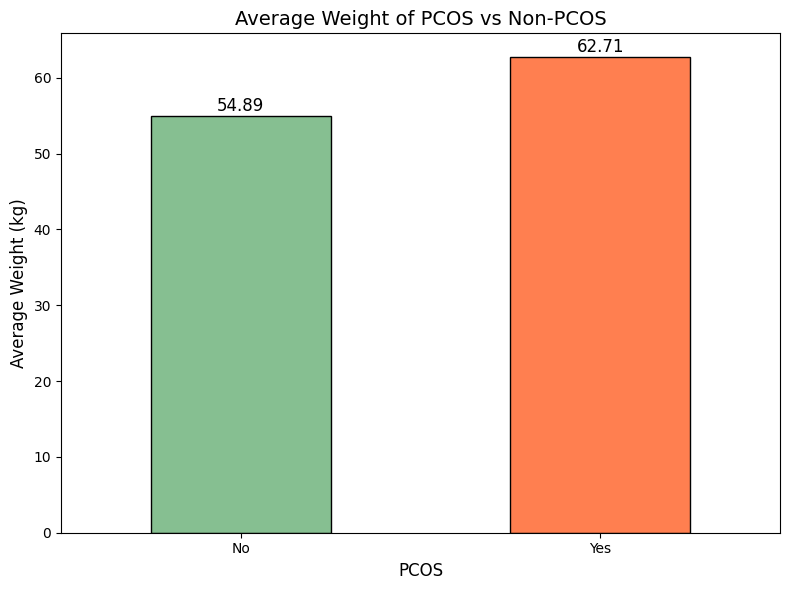

In [137]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'Weight_kg' and 'PCOS' are the relevant columns
# Group by 'PCOS' and calculate the mean of 'Weight_kg'
avg_weight = df.groupby('PCOS')['Weight_kg'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = avg_weight.plot(kind='bar', color=['#86bf91', '#ff7f50'], edgecolor='black')

# Add title and labels
plt.title('Average Weight of PCOS vs Non-PCOS', fontsize=14)
plt.xlabel('PCOS', fontsize=12)
plt.ylabel('Average Weight (kg)', fontsize=12)
plt.xticks(rotation=0)

# Add values on top of the bars
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add the value on top of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


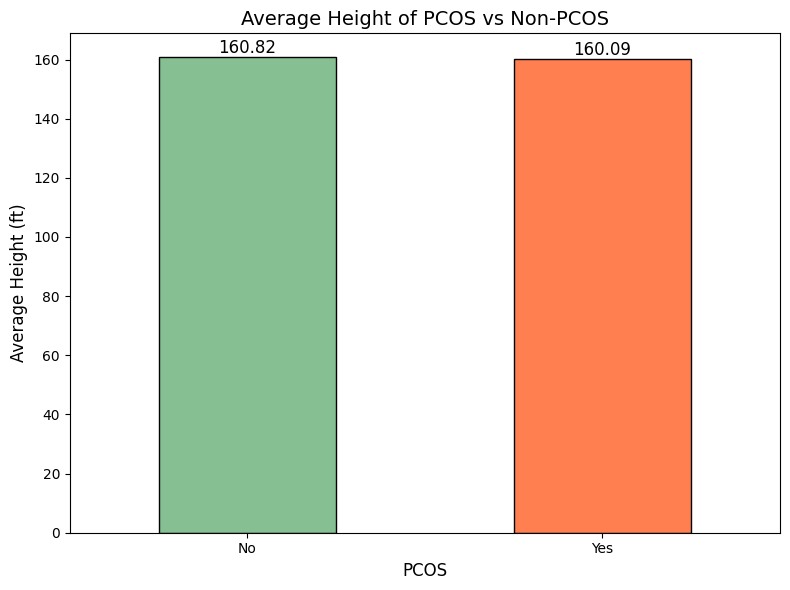

In [136]:
import matplotlib.pyplot as plt

# Assuming 'Height_ft' and 'PCOS' are the relevant columns in the DataFrame 'df'
# Group by 'PCOS' and calculate the mean of 'Height_ft'
avg_height = df.groupby('PCOS')['Height_ft'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = avg_height.plot(kind='bar', color=['#86bf91', '#ff7f50'], edgecolor='black')

# Add title and labels
plt.title('Average Height of PCOS vs Non-PCOS', fontsize=14)
plt.xlabel('PCOS', fontsize=12)
plt.ylabel('Average Height (ft)', fontsize=12)
plt.xticks(rotation=0)

# Add values on top of the bars
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add the value on top of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [139]:
value_counts = df['Age'].value_counts()
print(value_counts)

Age
20-25           102
Less than 20     56
25-30             4
35-44             4
45 and above      4
30-35             2
Name: count, dtype: int64


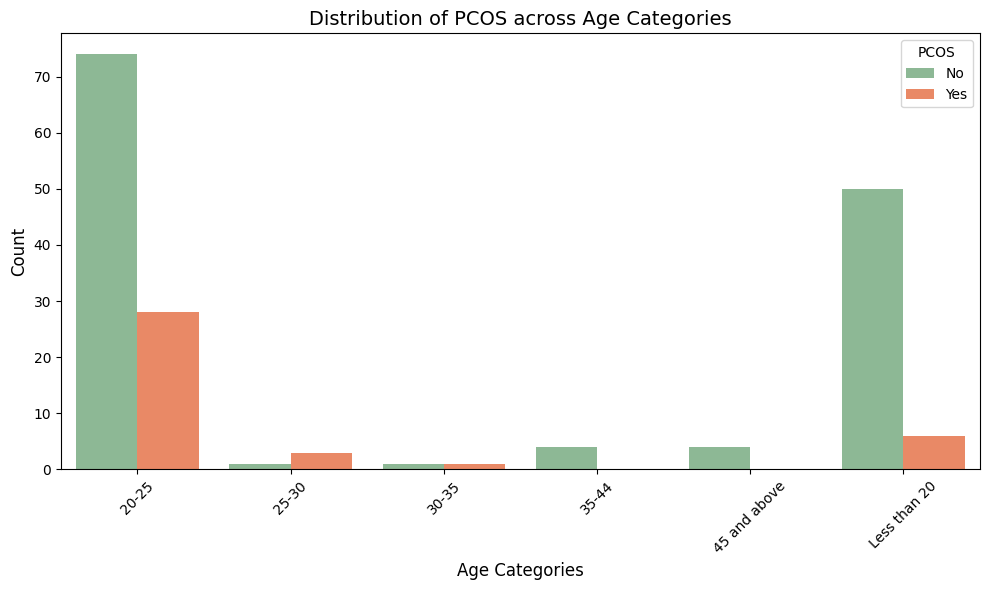

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Age' and 'PCOS' are categorical columns in your DataFrame 'df'
# Create a count plot to show the distribution of 'PCOS' for each 'Age' category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', hue='PCOS', palette=['#86bf91', '#ff7f50'])

# Add title and labels
plt.title('Distribution of PCOS across Age Categories', fontsize=14)
plt.xlabel('Age Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
